Perform Principal component analysis and perform clustering using first
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain
optimum number of clusters and check whether we have obtained same number of clusters with the original data
(class column we have ignored at the begining who shows it has 3 clusters)df


In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [68]:
from google.colab import files
upload = files.upload()

Saving wine.csv to wine (2).csv


In [69]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [70]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [71]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [72]:
df.shape

(178, 14)

In [73]:
df1=df.iloc[:,1:14]
df1.shape

(178, 13)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Standardisation

In [75]:
SS=StandardScaler()
df2=SS.fit_transform(df1)
df2

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Applying PCA

In [76]:
pca=PCA()
X_pca=pca.fit_transform(df2)

In [77]:
comp=pca.components_
C= pd.DataFrame(comp)
C.shape
# C is a matrix of Eigen Vectors (Principal components)

(13, 13)

In [78]:
var = pca.explained_variance_ratio_
var
#The proportion of the total data variance captured by each principal component
#Useful for choosing how many components to keep.

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

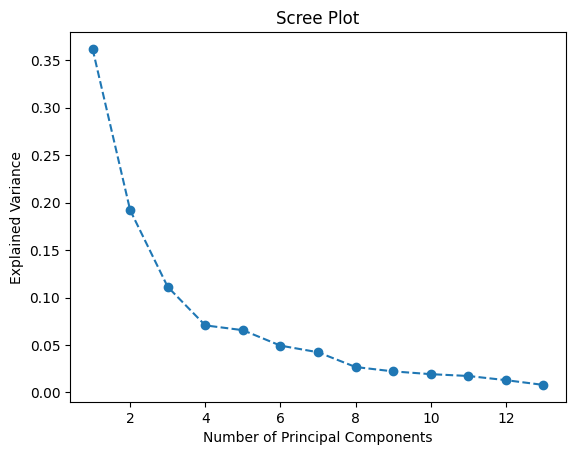

In [79]:
plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

we can have 3 principal components

In [80]:
# Cummulative variance of each PCA
Var = np.cumsum(np.round(var,decimals= 4)*100)
Var


array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

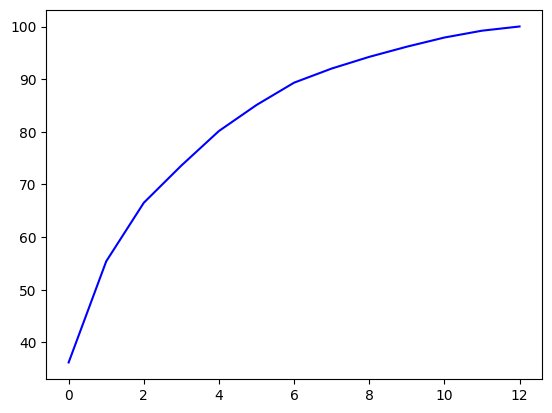

In [81]:
plt.plot(Var,color="blue")

In [82]:
# Final Dataframe
final_df=pd.concat([df['Type'],pd.DataFrame(X_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


# Hierarchial Clustering

Single

In [83]:
df_new= final_df.iloc[:,1:4]
df_new.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


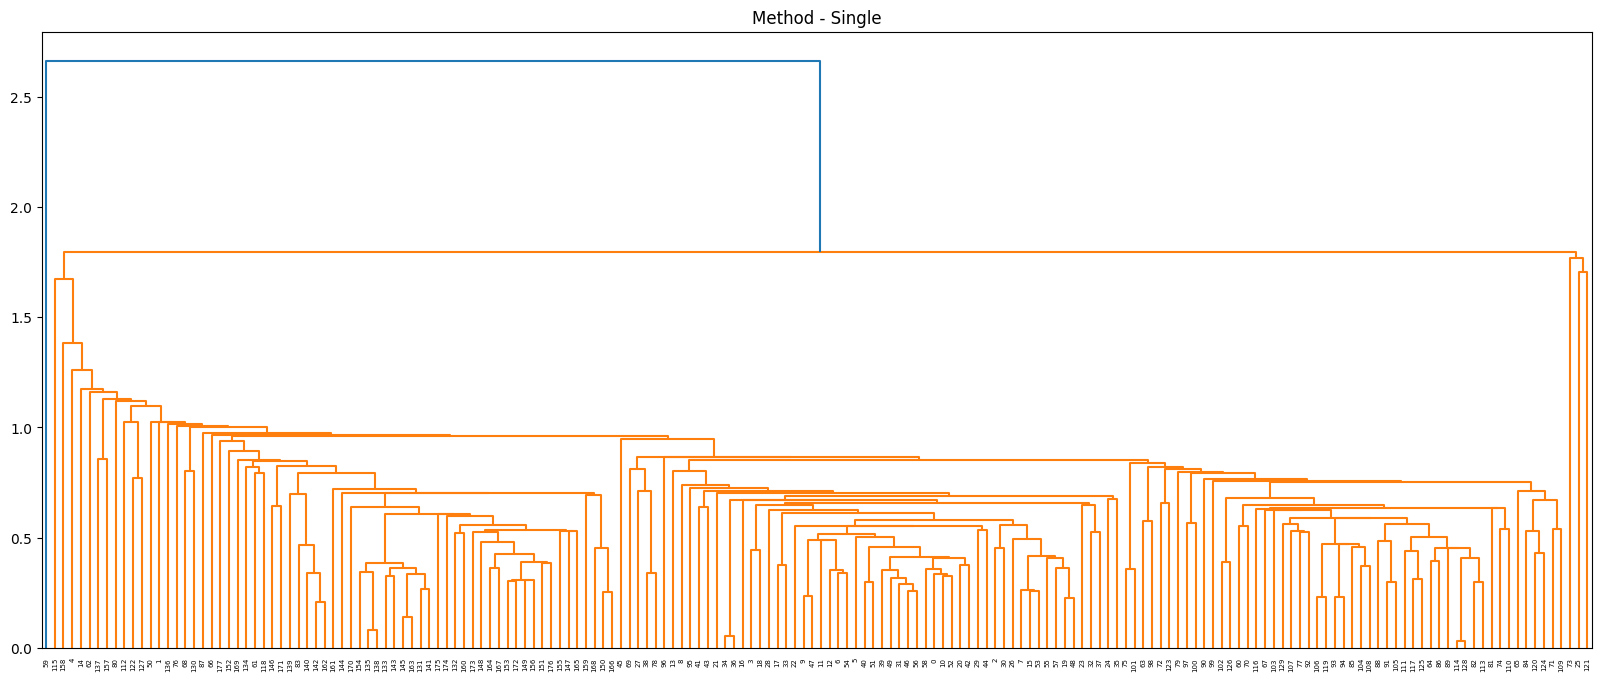

In [84]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_new, method='single'))
plt.title("Method - Single")
plt.show()

In [85]:
#creating clusters method - single
HCS = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'single')

In [86]:
Y_HCS = HCS.fit_predict(df_new)
Clusters_s = pd.DataFrame(Y_HCS, columns=['Cluster'])
Clusters_s.value_counts()
#print(Clusters_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          177
1            1
dtype: int64

In [87]:
df['h_clusterid'] = Clusters_s
df.groupby('h_clusterid').agg(['mean']).reset_index()
#print(df)

,h_clusterid,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.937853,13.004181,2.344237,2.372203,19.545198,99.80791,2.296893,2.037514,0.362316,1.597514,5.07565,0.956927,2.616158,748.175141
1,1,2.000000,12.370000,0.940000,1.360000,10.600000,88.00000,1.980000,0.570000,0.280000,0.420000,1.95000,1.050000,1.820000,520.000000


Average

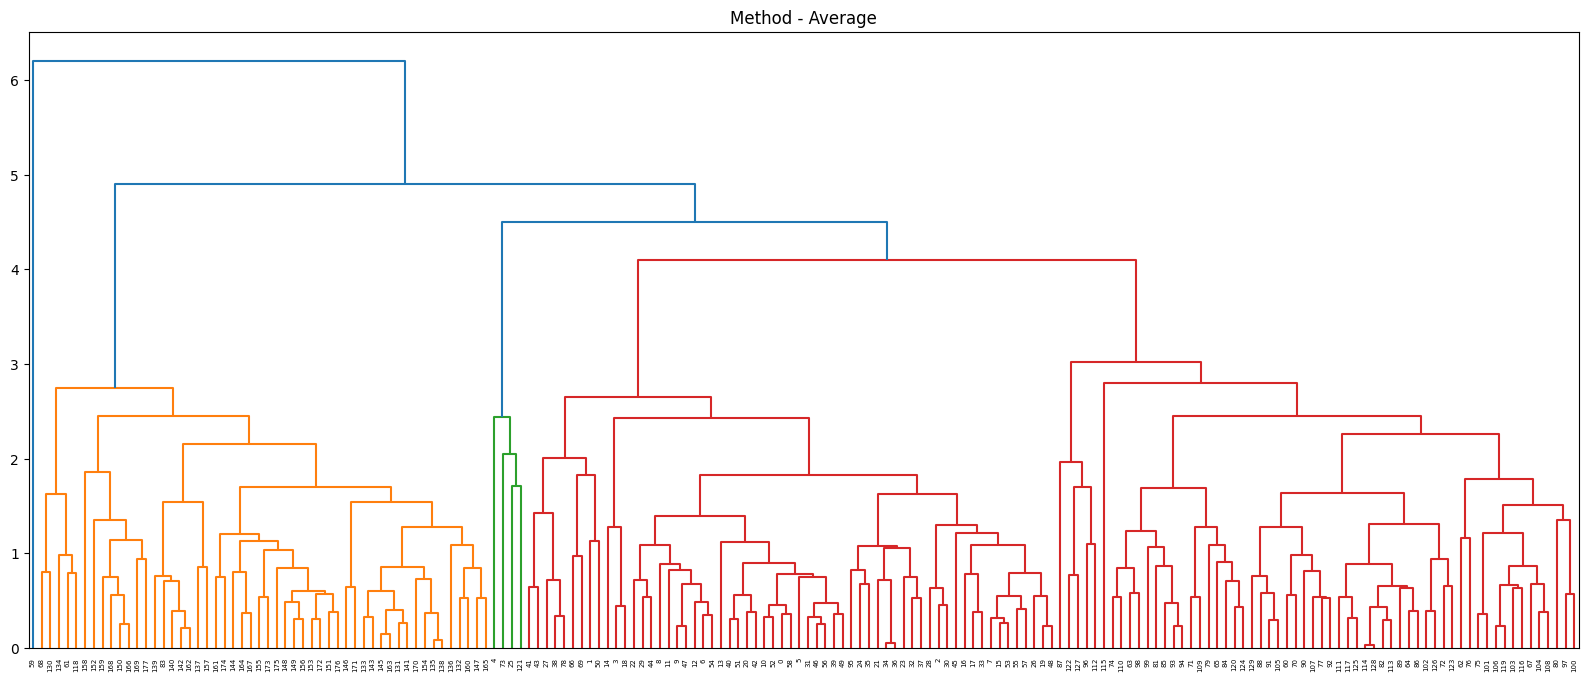

In [88]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_new, method='average'))
plt.title("Method - Average")
plt.show()

In [94]:
#creating clusters method - average
HCA = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage= 'average')
Y_HCA = HCA.fit_predict(df_new)
Clusters_a = pd.DataFrame(Y_HCA, columns=['Cluster'])
Clusters_a.value_counts()
#print(Clusters_a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          121
2           52
1            4
3            1
dtype: int64

In [95]:
df['h_clusterid'] = Clusters_a
df.groupby('h_clusterid').agg(['mean']).reset_index()
#print(df)

,h_clusterid,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.528926,12.956364,1.958347,2.333058,18.633884,99.371901,2.530826,2.514380,0.322231,1.787851,4.206612,1.063273,2.985785,802.396694
1,1,1.500000,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000
2,2,2.923077,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000


Complete

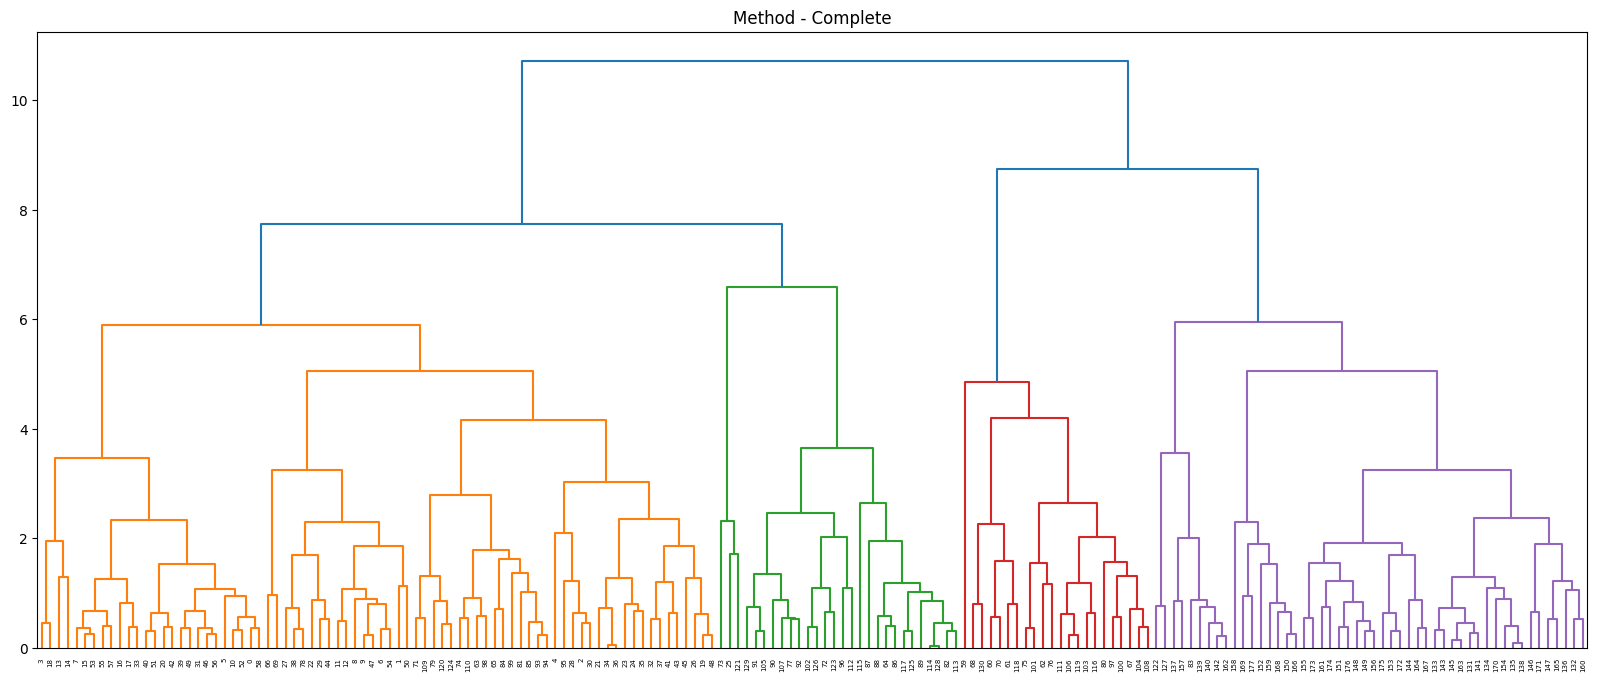

In [93]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_new, method='complete'))
plt.title("Method - Complete")
plt.show()

In [98]:
#creating clusters method - average
HCC = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage= 'complete')
Y_HCC = HCC.fit_predict(df_new)
Clusters_c = pd.DataFrame(Y_HCC, columns=['Cluster'])
Clusters_c.value_counts()
#print(Clusters_c)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
3          78
1          50
0          28
2          22
dtype: int64

In [99]:
df['h_clusterid'] = Clusters_c
df.groupby('h_clusterid').agg(['mean']).reset_index()
#print(df)

,h_clusterid,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.964286,12.193929,2.023571,2.449286,22.453571,94.321429,2.129643,2.066786,0.422857,1.504643,2.934643,1.050000,2.814643,503.571429
1,1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,3,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436


Ward

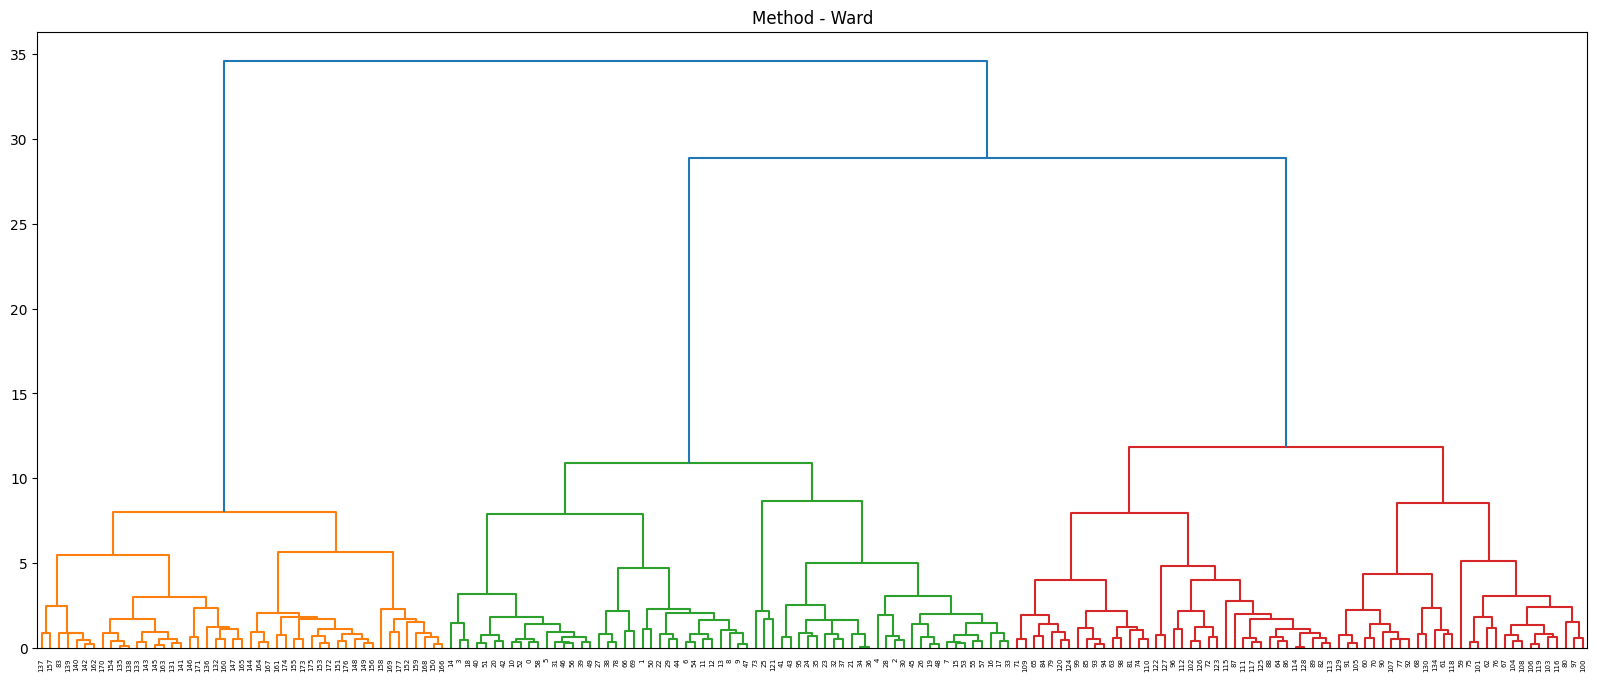

In [100]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_new, method='ward'))
plt.title("Method - Ward")
plt.show()

In [101]:
#creating clusters method - average
HCW = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'ward')
Y_HCW = HCW.fit_predict(df_new)
Clusters_w = pd.DataFrame(Y_HCW, columns=['Cluster'])
Clusters_w.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          66
2          65
1          47
dtype: int64

In [103]:
silhouette_HCS = silhouette_score(df_new, Y_HCS)
silhouette_HCA = silhouette_score(df_new, Y_HCA)
silhouette_HCC = silhouette_score(df_new, Y_HCC)
silhouette_HCW = silhouette_score(df_new, Y_HCW)
print(silhouette_HCS)
print(silhouette_HCA)
print(silhouette_HCC)
print(silhouette_HCW)

0.36310673051041403
0.32173131311197717
0.35784842685673074
0.44594921980629704


Ward method score the Highest silhouette score

# K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

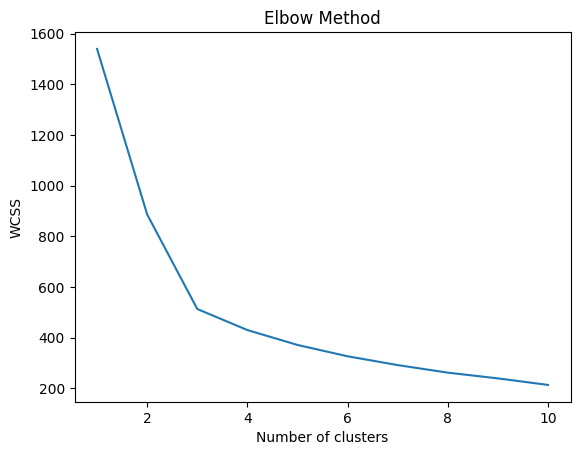

In [105]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(df_new)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
kmeans = KMeans(n_clusters=3, random_state=32)
kmeans.fit(df_new)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
silhouette_K = silhouette_score(df_new,labels)
print(silhouette_K)

0.45379998482576156


In [116]:
df['K_clusterid'] = kmeans.labels_
df.groupby('K_clusterid').agg(['mean']).reset_index()

,K_clusterid,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,1.492308
1,1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.058824
2,2,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.854839


In [118]:
KMeans_labels = pd.DataFrame(labels, columns=['clusters_KMeans'])
df=pd.concat([df, KMeans_labels], axis=1)
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,K_clusterid,clusters_KMeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3,2,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3,2,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,2,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3,2,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3,2,2


In [120]:
df['clusters_KMeans'].value_counts()

0    65
2    62
1    51
Name: clusters_KMeans, dtype: int64

In [121]:
#clusters by KMeans
df.groupby('clusters_KMeans').agg(['mean']).reset_index()

,clusters_KMeans,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,K_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,1.492308,0.0
1,1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.058824,1.0
2,2,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.854839,2.0


KMeans clustering has the best score of 0.4537. We get from this the optimum clusters as 3.

In [124]:
df_compare=df[['Type','clusters_KMeans']]
df_compare['clusters_KMeans'] = df_compare['clusters_KMeans'].replace({0: 1, 1: 2, 2: 3})
# 'df_compare' now has 'clusters_KMeans' values changed to 1, 2, 3.
df_compare

<ipython-input-124-a801d16d1c1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare['clusters_KMeans'] = df_compare['clusters_KMeans'].replace({0: 1, 1: 2, 2: 3})


,Type,clusters_KMeans
0,1,3
1,1,3
2,1,3
3,1,3
4,1,3
...,...,...
173,3,2
174,3,2
175,3,2
176,3,2


In [126]:
df_compare['clusters_KMeans'].value_counts()

1    65
3    62
2    51
Name: clusters_KMeans, dtype: int64

In [127]:
df_compare['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

Originally, the data was divided into 3 groups of 59,71 and 48.

After PCA and KMeans clustering, it was divided into 3 groups of 65,51 and 62. It was more evenly divided compared to earlier.